# Linear regression and Regularization

In this notebook I intend to explore the concepts of linear regression and regularization that I have been reading lately so I can make sure I understand them completly

The dataset I'll use will be the GeneralAdmisions dataset that I downloaded from Kaggle 
[Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019] (https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First I will read the data and grab a random sample of 8 datapoints from the dataset

In [33]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv", index_col="Serial No.")
data.sample(8)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
279,308,103,2,3.0,3.5,8.49,0,0.66
342,326,110,3,3.5,3.5,8.76,1,0.79
22,325,114,4,3.0,2.0,8.40,0,0.70
490,302,110,3,4.0,4.5,8.50,0,0.65
367,320,104,3,3.5,4.5,8.34,1,0.74
351,318,107,3,3.0,3.5,8.27,1,0.74
500,327,113,4,4.5,4.5,9.04,0,0.84
410,300,98,1,2.0,2.5,8.02,0,0.61


## Theory of Linear Regression

For starters, I will explain what linear regression is to have clarity of what it means to use it.

<u><b>Linear regression:</b></u> A prediction technique in which we fit a straight line (or plane/hyperplane if multiple variables are involved) to the data in order to make an prediction from an independent variable (predict the target from features).

First I will try to predict the 'Chance of Admit' from a single variable in order to be able to visualize it in 2D. After that, I will apply the same process for 2 features. This process will be done by "hand", meaning I will try to arrive to the equations manually so I can then compare it to the sklearn linear regression method.

After that is complete, I will use regularization to see how different it affects the data (more on regularization later).

### Data exploration
In order to apply linear regression to a single variable, I will first try to find a linear feature, ie. a feature that will allow me to observe the effects of linear regression. In order to find it, I will plot the correlation matrix (which shows us the linear correlation between each of the columns in the data set) and select the feature that is most correlated to 'Chance of Admit'.

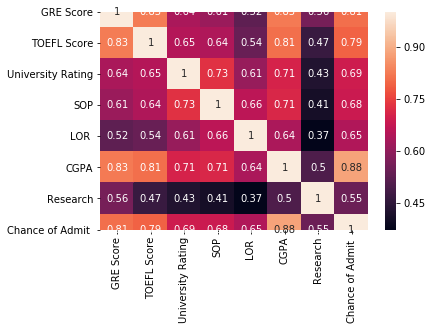

In [34]:
sns.heatmap(data.corr(), annot=True)

According to the heatmap, 'CGPA' is the feature that is most highly correlated to 'Chance of Admit' with a score of 0.88, so I will start with that one. I will use a scatter plot to see how 'CGPA' is related to 'Chance of Admit' at a data point level.

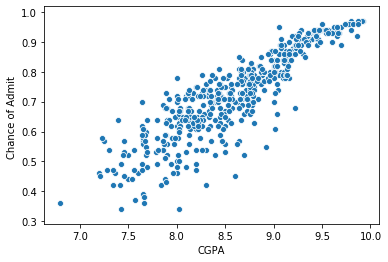

In [35]:
sns.scatterplot(x=data['CGPA'], y=data["Chance of Admit "])
plt.show()

We can see that a nice straight line would fit up very wall against this data points

## The Math

First we need a loss function (the one that will tell us how far of the mark the prediction lies). I'll choose the least sum of squares as the loss function. This simply means that in order to determine how good a line fits the data, we square the distance from the y of each datapoint to the line, and sum each distance. This can be written in math as:<br><br>
&emsp; $L(x) = \sum _{i=1} ^{n} (\hat{y}_{i} - y_{i})^{2}$<br><br>
&emsp;&emsp;where:<br>
&emsp;&emsp;&emsp;&emsp;$\hat{y}_{i}$ = <i>target prediction of the ith point</i><br>
&emsp;&emsp;&emsp;&emsp;$y_{i}$ = $f(x_{i})$ = <i>the prediction we will make using the x of the ith point</i><br>
&emsp;&emsp;&emsp;&emsp;$n$ = <i>the number of datapoints in the dataset</i><br>

This loss function can be used to quantify many different models by using a different $f(x)$ for each model. Since we are interested in fitting a line to the data, we will pick the line equation to be our f(x):<br><br>
&emsp; $f(x) = ax + b$<br><br>
&emsp;&emsp;where:<br>
&emsp;&emsp;&emsp;&emsp;$a$ = <i>the slope of the function and, in case of logistic regression, the coefficient or weight that will be assigned to feature x</i><br>
&emsp;&emsp;&emsp;&emsp;$x$ = <i>the value of the feature (which we get from the data)</i><br>
&emsp;&emsp;&emsp;&emsp;$b$ = <i>the intercept of the function which is the value of y when x = 0 (or the height at which the point crosses the y axis). I remember someone also calling it the <b>bias</b> at uni</i><br>

We need to find $a$ and $b$ since $f(x)$ is a general equation for all straight lines in 2 dimensions and $a$ and $b$ are the <u>parameters</u> that define the equation for an individual line. If we were to plug $f(x)$ inside the loss function with different parameters, ie. calculating the loss function for different lines, we would of course obtain different values of $L(x)$. However, the goal of linear regression is to obtain the loss value of just one line: the one that yields us the lowest value. And since each individual line is defined by the parameters $a$ and $b$, our task is to find the set of parameters $a$ and $b$ which gives us the lowest loss value out of all the possible lines. By taking a page of calculus, we know that when the first derivative of a function is equal to 0, we have found a minima or maxima. In this case, it is impossible to have a maxima, since there is no maximum loss value (the worst possible line would be a straight line for which all data points would have an infinite distance). So we are confident to say that if we can find parameters $a$ and $b$ such that make the first derivative of $L(x)$ equal to 0, we will find the equation for the line that fits best our data.

### How do we do it???

Since there is more than one parameter that we need to find ($a$ and $b$), what we need to do is find the partial derivative of each parameter. This will gives us the necessary number of equations to solve (2 equations for 2 parameters, 3 equations for 3 parameters and so forth). So to start we have:<br><br>
&emsp; $$L(x) = \sum _{i=1} ^{n} (\hat{y}_{i} - y_{i})^{2}$$<br><br>
&emsp;which is the same as:<br><br>
&emsp;(1.1) $L(x) = \sum _{i=1} ^{n} (\hat{y}_{i} - (ax_{i} + b))^{2}$<br><br>
&emsp;Now we find the partial derivatives:<br><br>
&emsp;(1.2) $\frac{\partial{L(x)}}{\partial{a}} = \sum _{i=1} ^{n} 2 (\hat{y}_{i} - (ax_{i} + b)) (-x_{i})$&emsp;  <i>Note:</i>$\frac{\partial{y}}{\partial{b}} = x_{i}$<br><br>
&emsp;(1.3) $\frac{\partial{L(x)}}{\partial{b}} = \sum _{i=1} ^{n} 2 (\hat{y}_{i} - (ax_{i} + b))$&emsp; <i>Note:</i>$\frac{\partial{y}}{\partial{b}} = 1$<br><br>
&emsp;Since we are looking for the lowest loss value, we will make the partial derivatives equal to 0:<br><br>
&emsp;(1.4)$\frac{\partial{L(x)}}{\partial{a}} = 0 = \sum _{i=1} ^{n} (\hat{y}_{i} - (ax_{i} + b))(x_{i})$&emsp;  <i>Note:</i> the 2 and the - sign from $x_{i}$ dissapeared because now the equation is equal to 0, so we can move them to the left side where they will divide 0, which results in 0<br><br>
&emsp;(1.5)$\frac{\partial{L(x)}}{\partial{b}} = 0 = \sum _{i=1} ^{n} (\hat{y}_{i} - (ax_{i} + b))$<br><br>
&emsp;Now we just reduce the previous equations so we end up with a familiar form (at least for me XD):<br><br>
&emsp;(1.6)&emsp;$$\sum _{i=1} ^{n}\hat{y}_{i}x_{i} = a\sum _{i=1} ^{n}x_{i}^{2} + b\sum _{i=1} ^{n}x_{i}$$<br><br>
&emsp;(1.7)&emsp;$$ \sum _{i=1} ^{n} \hat{y}_{i} = a\sum _{i=1} ^{n}x_{i} + b\sum _{i=1} ^{n}1$$<br><br>

This is just a system of 2 equations with 2 variables ($a$ and $b$) that can be solved by any conventional methods. Next I will show the results to which I arrived in my physical notebook.

<b>Solutions to the equations</b><br><br>
I will solve this system of equations by substitution (there are other ways, like determinants, but to be honest substitution is the one I remember the most and since this is just for educational purposes I'd rather understand what I am doing).<br><br>
&emsp;The first step is try to isolate one of the variables ($b$) from one of the equations (1.7):<br><br>
&emsp;(1.8)&emsp;$n\hat{\bar{y}} = an\bar{x} + nb$&emsp; <i>Note:</i> This is possible because $\bar{x} = \sum _{i=1} ^{n} \frac{x_{i}}{n}$ by definition (the expected value) and $\sum _{i=1} ^{n} 1 = n$ (sum 1 n times)<br><br>
&emsp;Then we just isolate $b$ and we have:<br><br>
&emsp;(1.9)&emsp;$$b=\hat{\bar{y}} - a\bar{x}$$<br><br>
&emsp;The next step is to substitute the isolated variable ($b$) in the other equation (1.6):<br><br>
&emsp;(1.10)&emsp;$\sum _{i=1} ^{n} x_{i}y_{i} = a \sum _{i=1}^{n} x_{i}^{2} + (\hat{\bar{y}} - a\bar{x})\sum _{i=1} ^{n} x_{i}$<br><br>
&emsp;(1.11)&emsp;$\sum _{i=1} ^{n} x_{i}y_{i} = a \sum _{i=1}^{n} x_{i}^{2} + (\hat{\bar{y}} - a\bar{x}) n\bar{x}$<br><br>
&emsp;(1.12)&emsp;$\sum _{i=1} ^{n} x_{i}y_{i} = a \sum _{i=1}^{n} x_{i}^{2} + n\bar{x}\hat{\bar{y}} - an\bar{x}^{2} $<br><br>
&emsp;(1.13)&emsp;$\sum _{i=1} ^{n} x_{i}y_{i} - n\bar{x}\hat{\bar{y}} = a \sum _{i=1}^{n} x_{i}^{2} - an\bar{x}^{2} $<br><br>
&emsp;(1.14)&emsp;$$a = \frac{\sum _{i=1} ^{n} x_{i}y_{i} - n\bar{x}\hat{\bar{y}}} {\sum _{i=1}^{n} x_{i}^{2} - n\bar{x}^{2}}$$<br><br>
&emsp;Or if we don't want to use expected values:<br><br>
&emsp;(1.15)&emsp;$a = \frac{\sum _{i=1} ^{n} x_{i}y_{i} - n(\sum _{i=1}^{n}\frac{x_{i}}{n})(\sum _{i=1}^{n} \frac{\hat{y_{i}}}{n})} {\sum _{i=1}^{n} x_{i}^{2} - n(\sum _{i=1}^{n}\frac{x_{i}}{n})^{2}}$<br><br>
&emsp;(1.16)&emsp;$a = \frac{\sum _{i=1} ^{n} x_{i}y_{i} - \frac{\sum _{i=1}^{n}x_{i}\sum _{i=1}^{n} \hat{y_{i}}}{n}} {\sum _{i=1}^{n} x_{i}^{2} - \frac{(\sum _{i=1}^{n}x_{i})^{2}}{n}}$<br><br>
&emsp;(1.17)&emsp;$$a = \frac{n\sum _{i=1} ^{n} x_{i}y_{i} - \sum _{i=1}^{n}x_{i}\sum _{i=1}^{n} \hat{y_{i}}} {n\sum _{i=1}^{n} x_{i}^{2} - (\sum _{i=1}^{n}x_{i})^{2}}$$<br><br>
&emsp;And finally, to arrive to the simplest form (from 1.14):<br><br>
&emsp;(1.18)&emsp;$a = \frac{\sum _{i=1} ^{n} x_{i}y_{i} - n\bar{x}\hat{\bar{y}} - n\bar{x}\hat{\bar{y}} + n\bar{x}\hat{\bar{y}}} {\sum _{i=1}^{n} x_{i}^{2} -2 n\bar{x}^{2} + n\bar{x}^{2}}$&emsp; <i>Note:</i> We just add and substract the last term to create a double term<br><br>
&emsp;(1.19)&emsp;$a = \frac{\sum _{i=1} ^{n} x_{i}y_{i} - \bar{x}\sum _{i=1}^{n} \hat{y_{i}} - \hat{\bar{y}}\sum _{i=1}^{n} x_{i} + \sum _{i=1}^{n} \bar{x}\hat{\bar{y}}} {\sum _{i=1}^{n} x_{i}^{2} - 2 \bar{x} \sum _{i=1}^{n} x_{i} + \sum _{i=1}^{n}{\bar{x}}^{2}}$<i>Note:</i> We get rid of expected values and bring the sums again<br><br>
&emsp;(1.20)&emsp;$a = \frac{\sum _{i=1} ^{n} (x_{i}y_{i} - \bar{x}\hat{y_{i}} - \hat{\bar{y}}x_{i}+ \bar{x}\hat{\bar{y}})} {\sum _{i=1}^{n}( x_{i}^{2} - 2 \bar{x} x_{i} + {\bar{x}}^{2})}$<i>Note:</i> We put all of the terms inside of a sum to end up with polinomials that can be factored out<br><br>
&emsp;After doing some factor algebra (diferencia de cuadrados, factor comun, etc.) we end up with the simplest form:<br><br>
&emsp;(1.21)&emsp;$$a = \frac{\sum _{i=1} ^{n} (x_{i} - \bar{x})(\hat{y_{i}} - \hat{\bar{y}})} {\sum _{i=1}^{n}(x_{i} - \bar{x})^{2}}$$


### Experiments

In the following cells, I will calculate the values of $a$ and $b$ using the 3 different equations from above to see if they are really the same value. Afterwards, I will use the coeficients to create the line that will predict the value

In [36]:
def predict(x):
    return a*x + b

def error(y, preds):    
    return ((y - preds) ** 2).sum()    


In [37]:
x = data["CGPA"]
y = data["Chance of Admit "]

In [38]:
#Using equation 1.14 (and .sum() because it is better if it is a numpy array)
a = ((x * y).sum() - len(x) * x.mean() * y.mean())/((x**2).sum() - len(x)*(x.mean() ** 2))
b = y.mean() - a*x.mean()
print("a:",a,"b:",b)
preds = predict(x)
error(y, preds)

a: 0.2059216789133165 b: -1.0443349238993254


2.200285078259776

In [39]:
#Using equation 1.17
a = (len(x)*(x*y).sum() - x.sum() * y.sum())/(len(x) * (x**2).sum() - (x.sum())**2)
b = y.mean() - a*x.mean()
print("a:",a,"b:",b)
preds = predict(x)
error(y, preds)

a: 0.20592167891326674 b: -1.0443349238988984


2.2002850782597765

In [40]:
#Using equation 1.21
a = ((x - x.mean()) * (y - y.mean())).sum() / ((x-x.mean())**2).sum()
b = y.mean() - a*x.mean()
print("a:",a,"b:",b)
preds = predict(x)
error(y, preds)

a: 0.20592167891328325 b: -1.04433492389904


2.2002850782597756

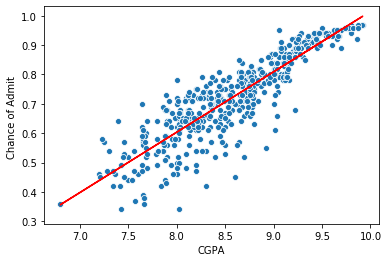

In [41]:
sns.scatterplot(x=x, y=y)
plt.plot(x,preds, "-r")
plt.show()

We can see that the variation in values is actually very small (I suspect the culprit is the precision in python when dealing with squares and such. So for the next part, I will keep the results of formula 1.21 (which shouldnt make much difference from the other ones).

Now I will compare the values with the scikit-learn linear regression to see how well I calculated the coefficients and the predictions

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_sk = LinearRegression()
lr_sk.fit(x.values.reshape(-1,1), y)
print(*lr_sk.coef_, lr_sk.intercept_)
preds = lr_sk.predict(x.values.reshape(-1,1))
error(y, preds) / len(x) #which is the same as mean squared error (I tested it)

0.2059216789132833 -1.0443349238990391


0.004400570156519552

As we can see, the coefficients and the intercept are the same as the last $a$ and $b$. The predictions are also the same so it is safe to say that I have replicated linear regression with one variable.

### $R^{2}$

The next thing to be done is to calculate the $R^{2}$ value to see for how much variation CGPA accounts for according to our loss function. The value of $R^{2}$ is given from the following equation:<br><br>
&emsp;(1.22)$R^{2} = \frac{VAR(mean(x)) - VAR(fit(x))}{VAR(mean(x))}$<br><br>
&emsp;where:<br>
&emsp;&emsp;$VAR(f(x)) = \frac{L(f(x))}{n}$ which in this experiment $L(x)$ is the least sum of squares<br>
&emsp;&emsp;$mean(x) = $ the mean value of all target predictions which is $\frac{\sum _{i=1} ^{n} x_{i}}{n}$<br>
&emsp;&emsp;$fit(x) = $ the function that we are using to predict the target (in this case $ax_{i} + b$)<br>


In [42]:
def r_sq(x, y):
    return (((y - y.mean())**2).sum() - ((y - (a*x + b))**2).sum()) / ((y - y.mean())**2).sum() 

In [43]:
r_sq(x, y)

0.7786519523497211

In the next 2 cells, I will use the scikit-learn metric and the linear regression model score to see how they are compared to my function

In [44]:
from sklearn.metrics import r2_score
r2_score(y, preds)

0.7786519523497211

In [45]:
lr_sk.score(x.values.reshape(-1,1), y)

0.778651952349721

As we can see, the values are identical, which means I also suceeding in implementing the $R^{2}$ metric. The next step will be applying these 2 concepts (linear regression and $R^{2}$) with more than one variable

### Linear regression with 2 variables plus intercept

To test how linear regression is affected (or not) by different attributes in the dataset, I will fit a line to 1 more feature in the dataset, and then I fit a line to the combination of all 2. I will follow the same process that I did for 1 variable (obtaining the partial derivative of each parameter to be found) but because of space, I will limit myself to just write the equations for different parameters.

&emsp;(2.1)&emsp;$$b= \hat{\bar{y_i}} - a_{0}\bar{x_{0}} - a_{1}\bar{x_{1}}$$<br><br>
&emsp;(2.2)&emsp;$$a_{1} = \frac{\sum _{i=1}^{n} (x_{1} - \bar{x_{1}})(\hat{y} - \hat{\bar{y_i}}) - a_0 \sum _{i=1} ^{n} (x_0 - \bar{x_0})(x_1 - \bar{x_1})}{\sum _{i=1}^n(x_1 - \bar{x_1})^2}$$
&emsp;(2.3)&emsp;$$a_0 = \frac{\sum _{i=1}^n x_0\hat{y_i} - \sum _{i=1}^n(x_1-\bar{x_1})(\hat{y}-\hat{\bar{y}})-n\bar{x_0}\hat{y}\sum _{i=1}^n(x_1-\bar{x_1})^2 + n\bar{x_0}\sum _{i=1}^n(x_1-\bar{x_1})(\hat{y}-\hat{\bar{y}})}{(\sum _{i=1}^n x_0^2)(\sum _{i=1}^n (x_1-\bar{x_1})^2)-\sum_{i=1}^n x_0x_1 + n\bar{x_0}\bar{x_1} - n\bar{x_0}^2\sum _{i=1}^n(x_1-\bar{x_1})^2-n\bar{x_0}\sum _{i=1}^n x_0x_1 + n^2\bar{x_0}^2\bar{x_1}}$$

In [17]:
def get_a0(x0, x1, y):
    n = len(y)
    exp_x0 = x0.mean()
    exp_x1 = x1.mean()
    exp_y = y.mean()
    numerator = ((x0-exp_x0)*(y-exp_y)).sum() - (((x1-exp_x1)*(y-exp_y)).sum() * ((x0-exp_x0)*(x1-exp_x1)).sum())
    denominator = (((x0-exp_x0)**2).sum() * ((x1-exp_x1)**2).sum()) - (((x0-exp_x0)*(x1-exp_x1)).sum() ** 2)
    return numerator / denominator

def get_a1(x0, x1, y, a0):
    n = len(y)
    exp_x0 = x0.mean()
    exp_x1 = x1.mean()
    exp_y = y.mean()
    
    numerator = ((x1 - exp_x1) * (y - exp_y)).sum() - a0 * ((x0 - exp_x0) * (x1 - exp_x1)).sum()
    denominator = ((x1 - exp_x1)**2).sum()
    
    return numerator / denominator

def get_b(x0, x1, y, a0, a1):
    return y.mean() - a0*x0.mean() - a1*x1.mean()
    

In [18]:
x0 = data["CGPA"]
x1 = data["GRE Score"]
y = data["Chance of Admit "]

In [19]:
a0 = 0.1564639738347355 #Note: I use the value from the linear regression model since the equation value is wrong. The other values are good so it is just my algebra
a1 = get_a1(x0, x1, y, a0)
b = get_b(x0, x1, y, a0, a1)
print("a0:", a0, "a1:", a1, "b:", b)

a0: 0.1564639738347355 a1: 0.0032066172267026555 b: -1.6349684507242226


In [89]:
lr_2vars = LinearRegression()
lr_2vars.fit(data[["CGPA", "GRE Score"]], y)
print(lr_2vars.score(data[["CGPA", "GRE Score"]], y))
print(*lr_2vars.coef_, lr_2vars.intercept_)

0.7995882998588076
0.1564639738347355 0.0032066172267026577 -1.6349684507242217


In [86]:
#This cell is just to make sure that the predict function works the same way the theory is supposed to work. After all this is a learning notebook 
linear = LinearRegression()
linear.fit(data.iloc[:,:-1], y)
print(*linear.coef_, linear.intercept_)
(linear.predict(data.iloc[:,:-1]) == data.iloc[:,:-1].dot(linear.coef_) + linear.intercept_).value_counts()

0.001858506485010229 0.00277797239141956 0.00594136804017674 0.0015861374557666302 0.01685874235241868 0.11838505345773809 0.024307478582166035 -1.2757250829969924


True    500
dtype: int64

In [88]:
linear.score(data.iloc[:,:-1], y)

0.8219007395178417

## Regularization

Here I observe how the penalty for regularization modifies the coefficients obtained by linear regression. Since the algebra becomes a little bit more complicated by this point I will directly use the scikit-learn functions to observe it. First I will need to split the dataset into training and validation set. Afterwards I will use the linear regression model and calculate the mean squared error of both training and validation sets.

In [152]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(data.iloc[:,:-1], y)
plot_x = np.arange(data["CGPA"].min(), data["CGPA"].max(), 0.01)


0.0019306145789846246 0.0030420712127646674 0.009903887102408977 -0.002979991153371385 0.013019995875467413 0.12338995571316458 0.020151995668987104 -1.3528133758432614
Training error: 0.003783634285046716
Validation error: 0.002934144281883413


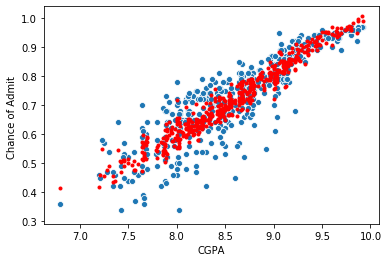

0.8203660445176724

In [185]:
linear = LinearRegression()
linear.fit(train_x, train_y)
print(*linear.coef_, linear.intercept_)
print("Training error:", mean_squared_error(train_y, linear.predict(train_x)))
print("Validation error:", mean_squared_error(val_y, linear.predict(val_x)))
sns.scatterplot(data["CGPA"], data.iloc[:,-1])
plt.plot(data["CGPA"], linear.predict(data.iloc[:,:-1]), ".r")
plt.show()
linear.score(data.iloc[:,:-1], data.iloc[:,-1])

0.002271967243314944 0.0 0.0 0.0 0.0 0.0 0.0 0.002725982573633212
Training error: 0.015845884479061444
Validation error: 0.011180771112183817


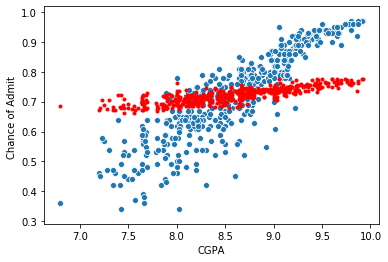

0.2616179169506493

In [177]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1) #Or the lambda
lasso.fit(data.iloc[:,:-1], y)
print(*lasso.coef_, lasso.intercept_)
print("Training error:", mean_squared_error(train_y, lasso.predict(train_x)))
print("Validation error:", mean_squared_error(val_y, lasso.predict(val_x)))
sns.scatterplot(data["CGPA"], data.iloc[:,-1])
plt.plot(data["CGPA"], lasso.predict(data.iloc[:,:-1]), ".r")
plt.show()
lasso.score(data.iloc[:,:-1], data.iloc[:,-1])

0.002053017876494989 0.002991856254299208 0.006420084289385704 0.002412195791478569 0.017431034632346423 0.10995639200462762 0.023621775710528686 -1.2938089377997177
Training error: 0.0038242691750103503
Validation error: 0.0027124415676041797


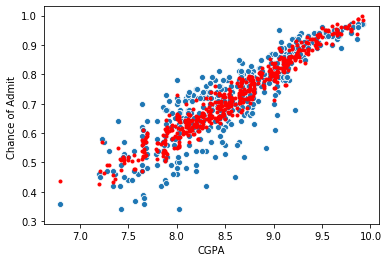

0.82162100134707

In [187]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=3) #Or the lambda
ridge.fit(data.iloc[:,:-1], y)
print(*ridge.coef_, ridge.intercept_)
print("Training error:", mean_squared_error(train_y, ridge.predict(train_x)))
print("Validation error:", mean_squared_error(val_y, ridge.predict(val_x)))
sns.scatterplot(data["CGPA"], data.iloc[:,-1])
plt.plot(data["CGPA"], ridge.predict(data.iloc[:,:-1]), ".r")
plt.show()
ridge.score(data.iloc[:,:-1], data.iloc[:,-1])

As we can see, ridge regression performs worse on the training set than normal linear regression (higher bias) but it performs better with the validation set (reduced variance).
As for the lasso regression, it seem that only GRE Score is relevant enough to make a prediction. So lets try to just use GRE Score to predict the probability of admittance.

In [99]:
linear = LinearRegression()
linear.fit(train_x["GRE Score"].values.reshape(-1,1), train_y)
print(*linear.coef_, linear.intercept_)

print("Training error:", mean_squared_error(train_y, linear.predict(train_x["GRE Score"].values.reshape(-1,1))))
print("Validation error:", mean_squared_error(val_y, linear.predict(val_x["GRE Score"].values.reshape(-1,1))))
linear.score(data["GRE Score"].values.reshape(-1,1), data["Chance of Admit "])

0.010240637873851727 -2.518320354972167
Training error: 0.006927165313529785
Validation error: 0.006530677113895819


0.6565504032619329

GRE Score by itself accounts for 65% of the variation in the data, which is not better than CGPAs 77%. Interesting result since supposedly lasso regression gives us the best coefficients we should use for feature importance. Let's try one more time but with normalized data

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.72174
Training error: 0.021470026
Validation error: 0.0151130116


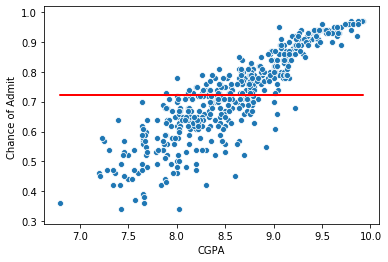

0.0

In [190]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1, normalize = True) #Or the lambda
lasso.fit(data.iloc[:,:-1], y)
print(*lasso.coef_, lasso.intercept_)
print("Training error:", mean_squared_error(train_y, lasso.predict(train_x)))
print("Validation error:", mean_squared_error(val_y, lasso.predict(val_x)))
sns.scatterplot(data["CGPA"], data.iloc[:,-1])
plt.plot(data["CGPA"], lasso.predict(data.iloc[:,:-1]), "r")
plt.show()
lasso.score(data.iloc[:,:-1], data.iloc[:,-1])

If we normalize, we can see that all of the coefficients are 0, except for the intercept. Something strange is going on here that I cannot understand with Lasso regression